# 1- `merge_ordered()`
- In the chapter we'll learn `merge_ordered`
- used in time-series or ordered data.
- Check out the below diagram
<img src='./media/merge_ordere.png' width=700 height=800>
- the results are standard merger with `outer` join but, the result is `sorted` 
- `sorted` make it good for time series data.
- let's discuss some of the difference between `merge()` & `merge_ordered()`
<img src= './media/mergeVsmergeorderd.png ' width=700 height=800>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- will be using **financial, microeconomical & stock market dataset.**

## stock data 
#### creating data for apple stocks from Jan 2007 to July 2007

In [2]:
#apple_stocks_data
data_appl = { 'date': ['2007-02-01', '2007-03-01', '2007-04-01', '2007-04-01', '2007-06-01'],
       'close': [12.087143, 13.272857, 14.257143, 17.312857, 17.434286]}

In [3]:
appl = pd.DataFrame(data_appl)
appl

,date,close
0,2007-02-01,12.087143
1,2007-03-01,13.272857
2,2007-04-01,14.257143
3,2007-04-01,17.312857
4,2007-06-01,17.434286


In [4]:
#macdonald's stock data
data_mcd = { 'date': ['2007-01-01', '2007-02-01', '2007-02-01', '2007-04-01', '2007-04-01'],
       'close': [44.349998, 43.689999, 45.049999, 48.279999, 50.549999]}

In [5]:
mcd = pd.DataFrame(data_mcd)
mcd

,date,close
0,2007-01-01,44.349998
1,2007-02-01,43.689999
2,2007-02-01,45.049999
3,2007-04-01,48.279999
4,2007-04-01,50.549999


### Merging  stocks data using `merge_ordered()`

In [6]:
pd.merge_ordered(appl, mcd, on='date', suffixes=('_appl', '_mcd'))

,date,close_appl,close_mcd
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-02-01,12.087143,45.049999
3,2007-03-01,13.272857,NaN
4,2007-04-01,14.257143,48.279999
5,2007-04-01,14.257143,50.549999
6,2007-04-01,17.312857,48.279999
7,2007-04-01,17.312857,50.549999
8,2007-06-01,17.434286,NaN


#### ffill argument (Forward fill)

<img src='./media/ffill.png' width=700 height=800 >

In [7]:
pd.merge_ordered(appl, mcd, on='date', suffixes=('_appl', '_mcd'), fill_method='ffill')

,date,close_appl,close_mcd
0,2007-01-01,NaN,44.349998
1,2007-02-01,12.087143,43.689999
2,2007-02-01,12.087143,45.049999
3,2007-03-01,13.272857,45.049999
4,2007-04-01,14.257143,48.279999
5,2007-04-01,14.257143,50.549999
6,2007-04-01,17.312857,48.279999
7,2007-04-01,17.312857,50.549999
8,2007-06-01,17.434286,50.549999


### When to use merge_ordered()?
- Best choice intead of `merge()` when working with Ordered data / time series
- Filling in missing values
- mostly in model trainning where we aviod missing data

# 2- `merge_asof()`
- similar to **merger_ordered()** left-join
- similar feature as **merge_ordered()**
- match on `nearest` key columns `not on exact match`
- Merge **on** column must be sorted
- In the table shown here, when we merge on column "C", we bring back all of the rows from the left table
<img src='./media/merge_asod().png'>

- However, the row selected from the right table is the last row whose "C" value is less than or equal to the "C" value in the left table. So, for example, the second row in the left table is matched with the third row in the right table. This because 3 is the closest value in the right table that is still less than or equal to 5.

**stock price data for the Visa company with entries for every hour on Nov, 11, 2017**

In [92]:
visa = pd.read_csv('./dataset/visa.csv')
ibm = pd.read_csv('./dataset/ibm.csv')

In [99]:
visa['date_time'] = pd.DatetimeIndex(visa['date_time'])
print(visa.shape)
visa.head()

(7, 2)


,date_time,close
0,2017-11-17 16:00:00,110.320
1,2017-11-17 17:00:00,110.240
2,2017-11-17 18:00:00,110.065
3,2017-11-17 19:00:00,110.040
4,2017-11-17 20:00:00,110.000


In [100]:
ibm['date_time'] = pd.DatetimeIndex(ibm['date_time'])
print(ibm.shape)
ibm.head()

(11, 2)


,date_time,close
0,2017-11-17 15:35:00,149.30
1,2017-11-17 15:40:00,149.13
2,2017-11-17 15:45:00,148.98
3,2017-11-17 15:50:00,148.99
4,2017-11-17 15:55:00,149.11


- First define left & right table.
- columns on which we want to merge
- suffixes
- Observe the result the columns are 7 b/c of left join

In [97]:
 pd.merge_asof(left=visa, right= ibm, on='date_time', suffixes=('_visa', '_ibm'))

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.25
1,2017-11-17 17:00:00,110.2400,149.96
2,2017-11-17 18:00:00,110.0650,149.96
3,2017-11-17 19:00:00,110.0400,149.96
4,2017-11-17 20:00:00,110.0000,149.96
5,2017-11-17 21:00:00,109.9966,149.96
6,2017-11-17 22:00:00,109.8200,149.96


In [101]:
pd.merge_asof(visa, ibm, on=['date_time'],suffixes=('_visa','_ibm'),direction='forward')

,date_time,close_visa,close_ibm
0,2017-11-17 16:00:00,110.3200,149.25
1,2017-11-17 17:00:00,110.2400,NaN
2,2017-11-17 18:00:00,110.0650,NaN
3,2017-11-17 19:00:00,110.0400,NaN
4,2017-11-17 20:00:00,110.0000,NaN
5,2017-11-17 21:00:00,109.9966,NaN
6,2017-11-17 22:00:00,109.8200,NaN


### When to use merge_asof()
- Data sampled from a process
- Developing a training set (no data leakage)

In [14]:
pop = pd.read_csv('./dataset/WorldBank_POP.csv')
pop.head()

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0


In [15]:
gdp = pd.read_csv('./dataset/WorldBank_GDP.csv')
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [16]:
pd.merge_asof(pop, gdp, on=['Year'], suffixes=('_pop', 'gdp'))

,Country Name_pop,Country Code_pop,Indicator Name_pop,Year,Pop,Country Namegdp,Country Codegdp,Indicator Namegdp,GDP
0,Aruba,ABW,"Population, total",2010,101669.0,United States,USA,GDP (current US$),1.499210e+13
1,Afghanistan,AFG,"Population, total",2010,29185507.0,United States,USA,GDP (current US$),1.499210e+13
2,Angola,AGO,"Population, total",2010,23356246.0,United States,USA,GDP (current US$),1.499210e+13
3,Albania,ALB,"Population, total",2010,2913021.0,United States,USA,GDP (current US$),1.499210e+13
4,Andorra,AND,"Population, total",2010,84449.0,United States,USA,GDP (current US$),1.499210e+13
...,...,...,...,...,...,...,...,...,...
2635,Kosovo,XKX,"Population, total",2018,1845300.0,United States,USA,GDP (current US$),2.049410e+13
2636,"Yemen, Rep.",YEM,"Population, total",2018,28498687.0,United States,USA,GDP (current US$),2.049410e+13
2637,South Africa,ZAF,"Population, total",2018,57779622.0,United States,USA,GDP (current US$),2.049410e+13
2638,Zambia,ZMB,"Population, total",2018,17351822.0,United States,USA,GDP (current US$),2.049410e+13


### comparsion

<img src='./media/diff_merge_Vs_mergeordered.png' width=700 height=800>

# 3- Selecting data with `.query()`

`.query('SOME SELECTION STATEMENT')`
- Accepts an input string
    - Input string used to determine what rows are returned
    - Input string similar to statement after **WHERE** clause in **SQL** statement
- Prior knowledge of SQL is not necessary


In [119]:
stocks = pd.read_csv('./dataset/stocks.csv')
stocks.head()

,date,disney,nike
0,2019-07-01,143.009995,86.029999
1,2019-08-01,137.259995,84.500000
2,2019-09-01,130.320007,93.919998
3,2019-10-01,129.919998,89.550003
4,2019-11-01,151.580002,93.489998


In [120]:
stocks.query('nike >= 90')

,date,disney,nike
2,2019-09-01,130.320007,93.919998
4,2019-11-01,151.580002,93.489998
5,2019-12-01,144.630005,101.309998
6,2020-01-01,138.309998,96.300003


In [121]:
stocks.query('nike > 90 and disney < 140')

,date,disney,nike
2,2019-09-01,130.320007,93.919998
6,2020-01-01,138.309998,96.300003


In [122]:
stocks.query('nike > 96 or disney < 98')

,date,disney,nike
5,2019-12-01,144.630005,101.309998
6,2020-01-01,138.309998,96.300003
8,2020-03-01,96.599998,82.739998


In [124]:
stocks_long = pd.read_csv('./dataset/stocks_long.csv')

In [125]:
stocks_long.query('stock=="disney" or (stock=="nike" and close < 90)')

,date,stock,close
0,2019-07-01,disney,143.009995
1,2019-08-01,disney,137.259995
2,2019-09-01,disney,130.320007
3,2019-10-01,disney,129.919998
4,2019-11-01,disney,151.580002
5,2019-07-01,nike,86.029999
6,2019-08-01,nike,84.500000
8,2019-10-01,nike,89.550003


# 4- Reshaping data with `.melt()`
- This method will unpivot the table from wide to long format.
- long format is much more commputer friendly & wide is easily readable by humans.

## WIDE vs LONG data:
- Sometimes you will observe that:
    - Every row relates to one subject & every columnhad different information about the attribute of that subject Data Format in this way is often called **WIDE**
    - When informations is found over many rows & each row had one attribute about that subject. Data formatted in this way is often called **LONG** ot **TALL** 
<img src = "./media/widevslong.png" width = 700 height = 700>

In [5]:
social_fin = pd.read_csv('./dataset/social_fin.csv')
social_fin

,financial,company,2019,2018,2017,2016
0,total_revenue,twitter,3459329,3042359,2443299,2529619
1,gross_profit,twitter,2322288,2077362,1582057,1597379
2,net_income,twitter,1465659,1205596,-108063,-456873
3,total_revenue,facebook,70697000,55838000,40653000,27638000
4,gross_profit,facebook,57927000,46483000,35199000,23849000
5,net_income,facebook,18485000,22112000,15934000,10217000


In [8]:
social_fin_tall = social_fin.melt(id_vars=['financial', 'company'])
social_fin_tall.head()

,financial,company,variable,value
0,total_revenue,twitter,2019,3459329
1,gross_profit,twitter,2019,2322288
2,net_income,twitter,2019,1465659
3,total_revenue,facebook,2019,70697000
4,gross_profit,facebook,2019,57927000


In [12]:
social_fin_tall = social_fin.melt(id_vars=['financial', 'company'],
                                 value_vars=['2018', '2017'])
social_fin_tall

,financial,company,variable,value
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000
5,net_income,facebook,2018,22112000
6,total_revenue,twitter,2017,2443299
7,gross_profit,twitter,2017,1582057
8,net_income,twitter,2017,-108063
9,total_revenue,facebook,2017,40653000


In [15]:
social_fin_tall = social_fin.melt(id_vars=['financial', 'company'],
                                 value_vars=['2018', '2017'],
                                 var_name='year',
                                 value_name= 'dollars')
social_fin_tall.head()

,financial,company,year,dollars
0,total_revenue,twitter,2018,3042359
1,gross_profit,twitter,2018,2077362
2,net_income,twitter,2018,1205596
3,total_revenue,facebook,2018,55838000
4,gross_profit,facebook,2018,46483000


### PRACTISE: 

1 - In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`. As always, pandas has been imported for you as pd.

In [45]:
gdp = pd.read_csv('./dataset/practise_dataset/gdp.csv')
sp500 = pd.read_csv('./dataset/practise_dataset/sp_500.csv')

- Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on year and date. Save the results as `gdp_sp500`.
- Print `gdp_sp500` and look at the returns for the year 2018.

In [4]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on= 'year', right_on='date', 
                             how='left')

# Print gdp_sp500
gdp_sp500

,countyr code,year,gdp,date,returns
0,USA,2010,1.500000e+13,2010.0,12.78
1,USA,2011,1.550000e+13,2011.0,0.00
2,USA,2012,1.620000e+13,2012.0,13.41
3,USA,2012,1.620000e+13,2012.0,13.41
4,USA,2013,1.680000e+13,2013.0,29.60
5,USA,2014,1.750000e+13,2014.0,11.39
6,USA,2015,1.820000e+13,2015.0,-0.73
7,USA,2016,1.870000e+13,2016.0,9.54
8,USA,2017,1.950000e+13,2017.0,19.42
9,USA,2018,2.050000e+13,NaN,NaN


- Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.

In [5]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on= 'year',
                             right_on= 'date', how = 'left', 
                             fill_method = 'ffill')


# Print gdp_sp509
gdp_sp500

,countyr code,year,gdp,date,returns
0,USA,2010,1.500000e+13,2010,12.78
1,USA,2011,1.550000e+13,2011,0.00
2,USA,2012,1.620000e+13,2012,13.41
3,USA,2012,1.620000e+13,2012,13.41
4,USA,2013,1.680000e+13,2013,29.60
5,USA,2014,1.750000e+13,2014,11.39
6,USA,2015,1.820000e+13,2015,-0.73
7,USA,2016,1.870000e+13,2016,9.54
8,USA,2017,1.950000e+13,2017,19.42
9,USA,2018,2.050000e+13,2017,19.42


- Subset the `gdp_sp500` table, select the gdp and returns columns, and save as `gdp_returns`.
- Print the correlation matrix of the `gdp_returns` table.

In [7]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.220321
returns  0.220321  1.000000


### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded.

In [46]:
gdp = pd.read_csv('./dataset/practise_dataset/gdp_1.csv')
pop = pd.read_csv('./dataset/practise_dataset/pop.csv')

In [49]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on = ['date','country'] ,
                             fill_method='ffill')

# Print ctry_date
ctry_date.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.846,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.286,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,8558835,SP.POP.TOTL


### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded below:

In [51]:
unemployment = pd.read_csv('./dataset/practise_dataset/unemployment.csv')
inflation = pd.read_csv('./dataset/practise_dataset/inflation.csv')

- Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on date with an inner join, and save the results as `inflation_unemploy`.
- Print the `inflation_unemploy`variable.
- Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi (inflation)` on the vertical axis.

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


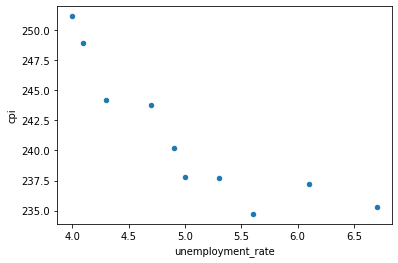

In [53]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind = 'scatter', x= 'unemployment_rate', y = 'cpi')
plt.show()

### Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas .diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

- Use `merge_asof()` to merge `jpm (left table)` and `wells` together on the `date_time` column, where the rows with the `nearest` times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.

- Use `merge_asof()` to merge `jpm_wells (left table)` and `bac` together on the `date_time` column, where the rows with the `closest` times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.

- Using `price_diffs`, create a line plot of the `close` price of `JPM, WFC, and BAC` only.

In [114]:
jpm = pd.read_csv('./dataset/practise_dataset/jmp.csv')
wells = pd.read_csv('./dataset/practise_dataset/wells.csv')
bac = pd.read_csv('./dataset/practise_dataset/bac.csv')

In [116]:
jpm['date_time'] = pd.DatetimeIndex(jpm['date_time'])
wells['date_time'] = pd.DatetimeIndex(wells['date_time'])
bac['date_time'] = pd.DatetimeIndex(bac['date_time'])

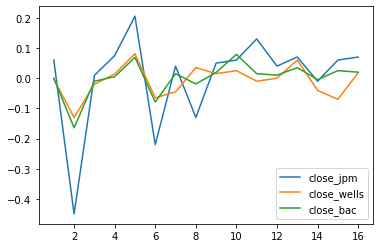

In [117]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on= 'date_time', suffixes=('', '_wells'), direction = 'nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac,  on= 'date_time', suffixes=('_jpm', '_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

### `.melt()`

In [18]:
inflation = pd.read_csv('./dataset/inflation.csv')
print(inflation.shapepe)
inflation.head(2)

(12, 4)


,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60


In [20]:
inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual').head()

<ipython-input-20-aecc5aeb93cc>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual').head()


,country,indicator,year,annual
0,Brazil,Inflation %,year,2017.0
1,Canada,Inflation %,year,2017.0
2,France,Inflation %,year,2017.0
3,India,Inflation %,year,2017.0
4,Brazil,Inflation %,year,2018.0
